In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# 5000 mouvements

## Path simulation 1
Chemin au dossier de la simulation

In [2]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/5000mouvements/1"

## Temps d'exécutions (ms)

In [3]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0     6  391894        0      0  391902


## Modèle SIR

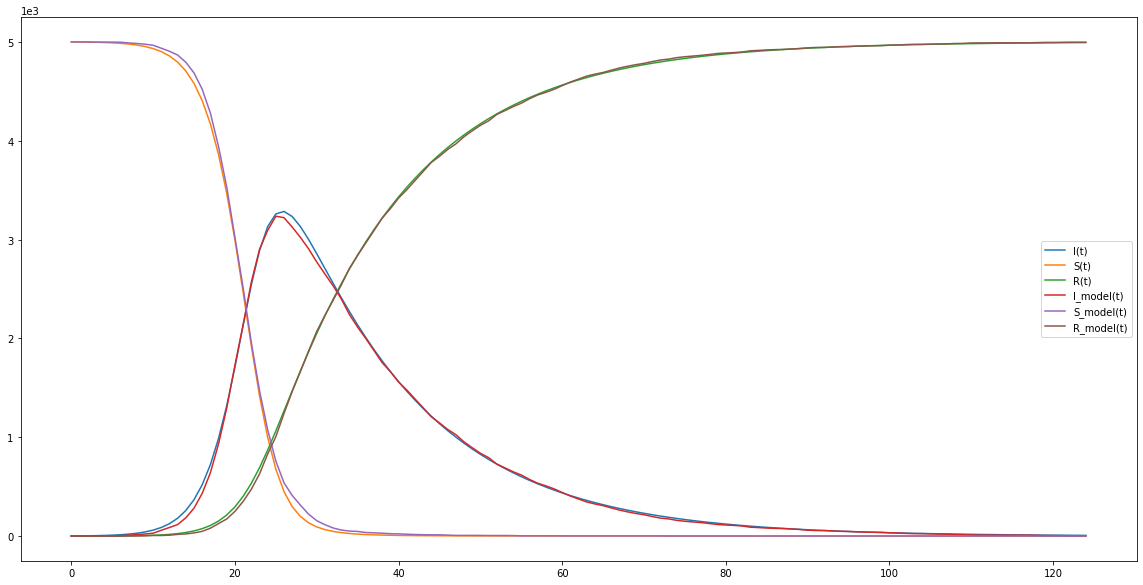

In [4]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.515
gamma = 0.062
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [5]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/5000mouvements/2"

## Temps d'exécutions (ms)

In [6]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    17  1136060        1      1  1136081


## Modèle SIR

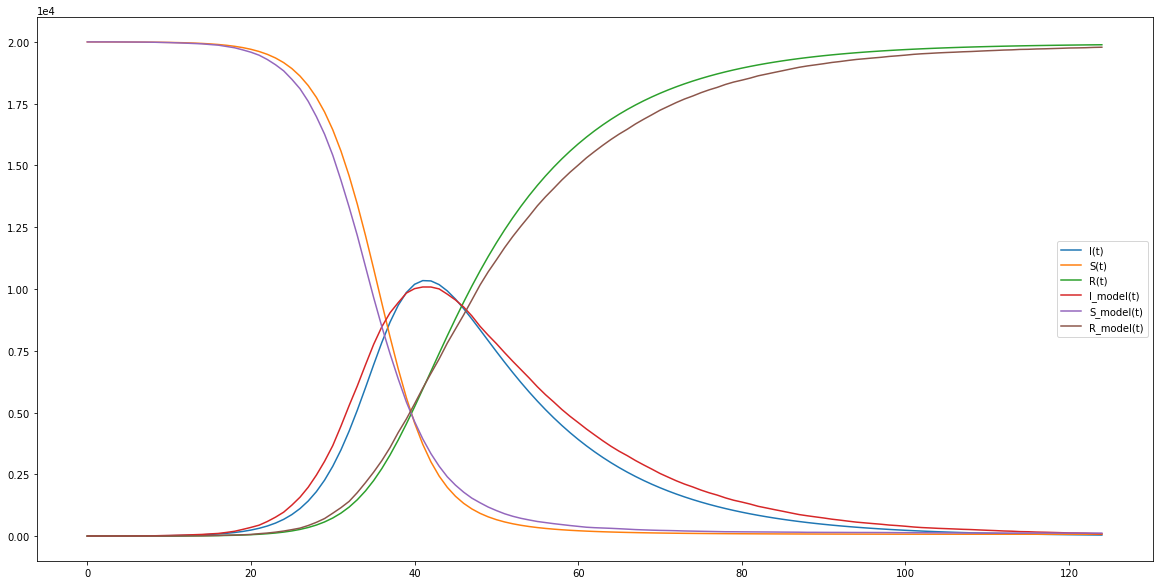

In [7]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.37
gamma = 0.07
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [8]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/5000mouvements/3"

## Temps d'exécutions (ms)

In [9]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    29  2418556        7      2  2418595


## Modèle SIR

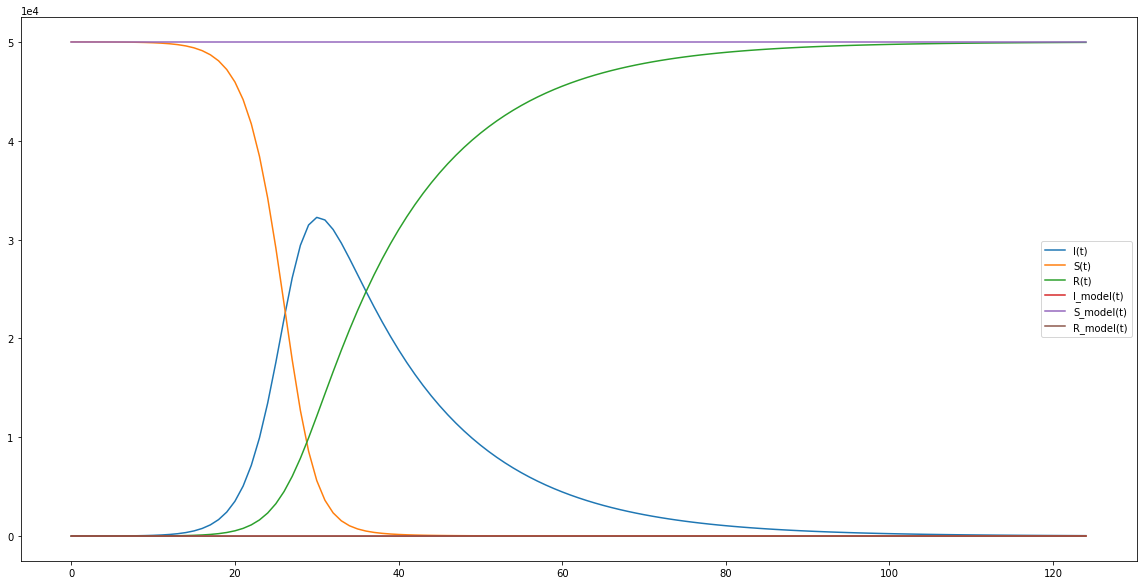

In [10]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.55
gamma = 0.07
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [11]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/5000mouvements/4"

## Temps d'exécutions (ms)

In [12]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    53  5799648        5     10  5799718


## Modèle SIR

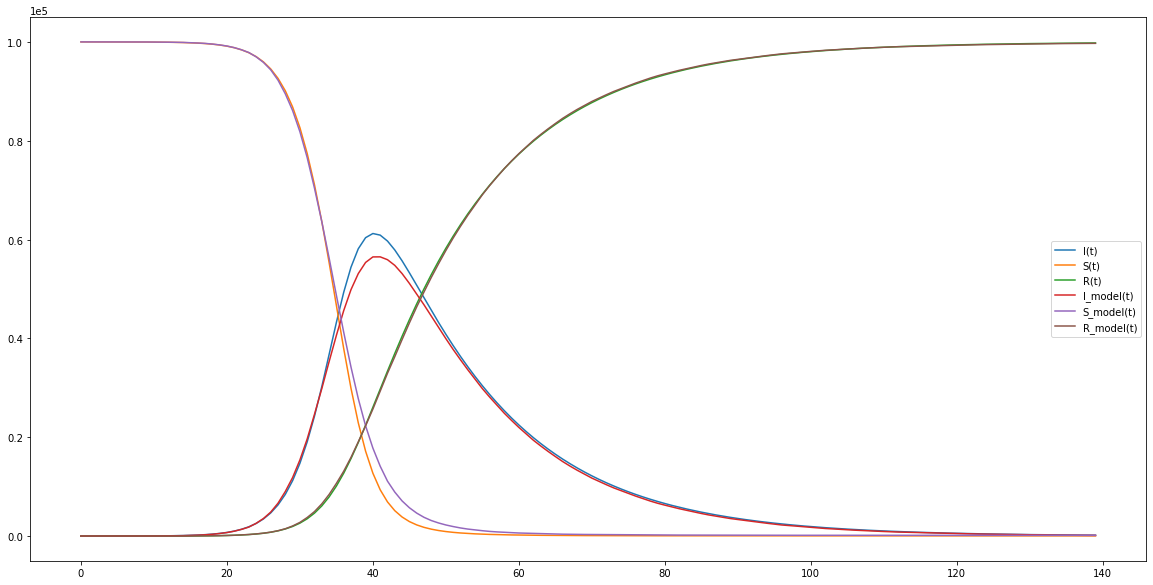

In [13]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.43
gamma = 0.06
iterations = 140

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Perfect mix

## Path simulation 1
Chemin au dossier de la simulation

In [14]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/perfect_mix/1"

## Temps d'exécutions (ms)

In [15]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init  Run  Mesures  Close  Total
0    16  323        0      0    340


## Modèle SIR

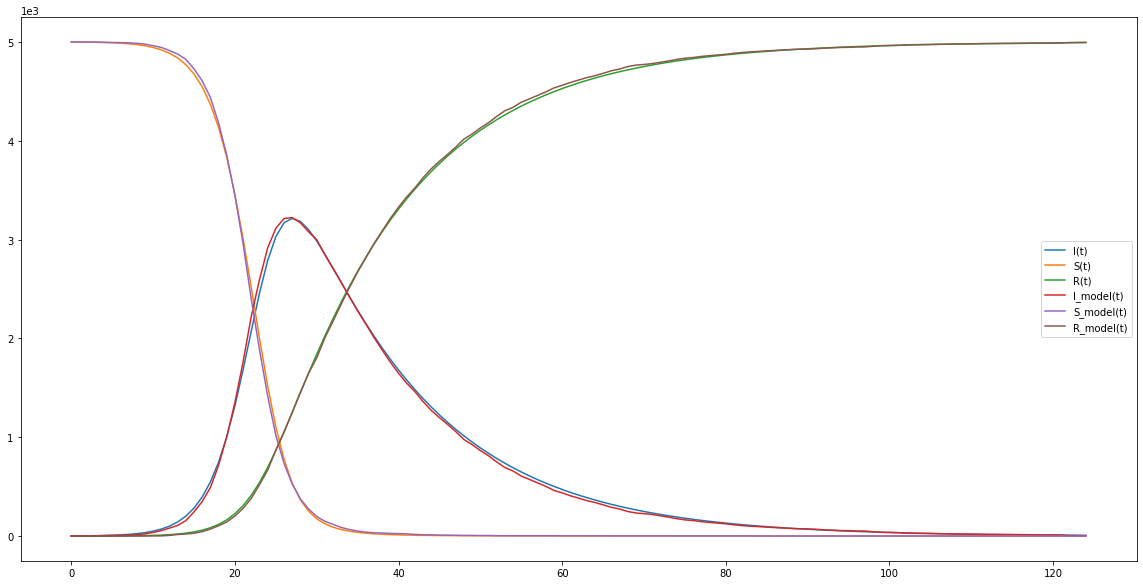

In [30]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.49
gamma = 0.062
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [17]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/perfect_mix/2"

## Temps d'exécutions (ms)

In [18]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init   Run  Mesures  Close  Total
0    19  1950        0      1   1972


## Modèle SIR

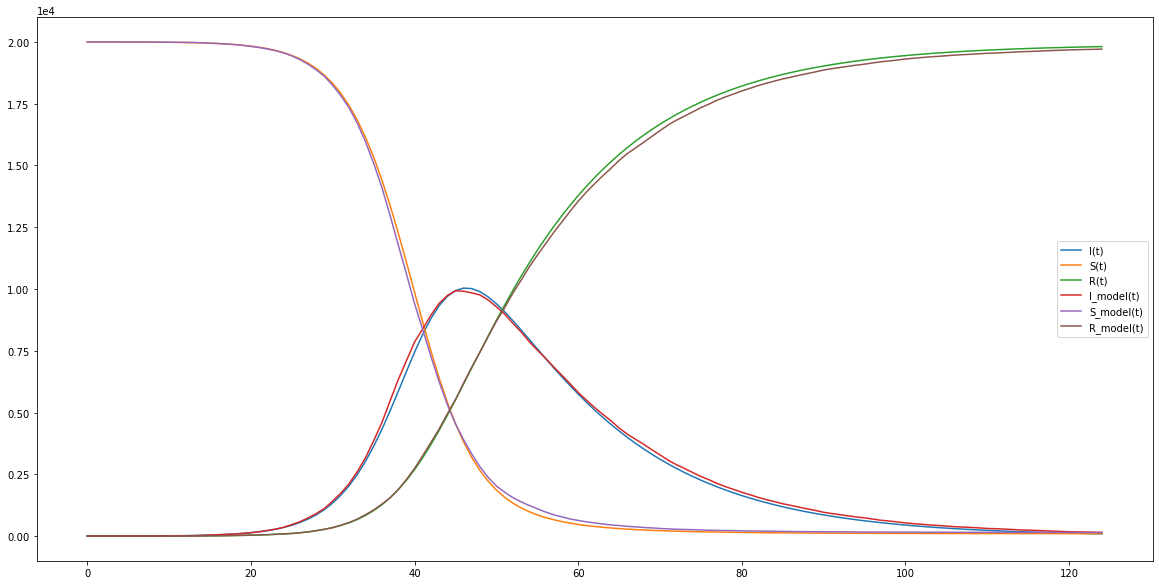

In [48]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.33
gamma = 0.065
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [20]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/perfect_mix/3"

## Temps d'exécutions (ms)

In [21]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init   Run  Mesures  Close  Total
0    33  3913        2      5   3954


## Modèle SIR

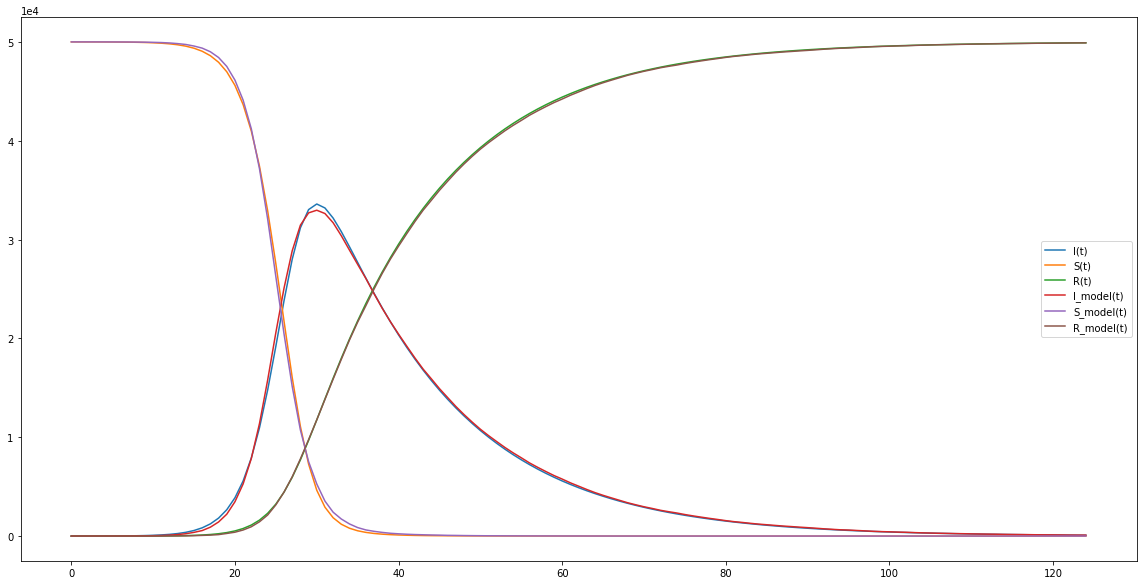

In [51]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.55
gamma = 0.063
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [23]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference/perfect_mix/4"

## Temps d'exécutions (ms)

In [24]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init   Run  Mesures  Close  Total
0    57  9016        5     10   9090


## Modèle SIR

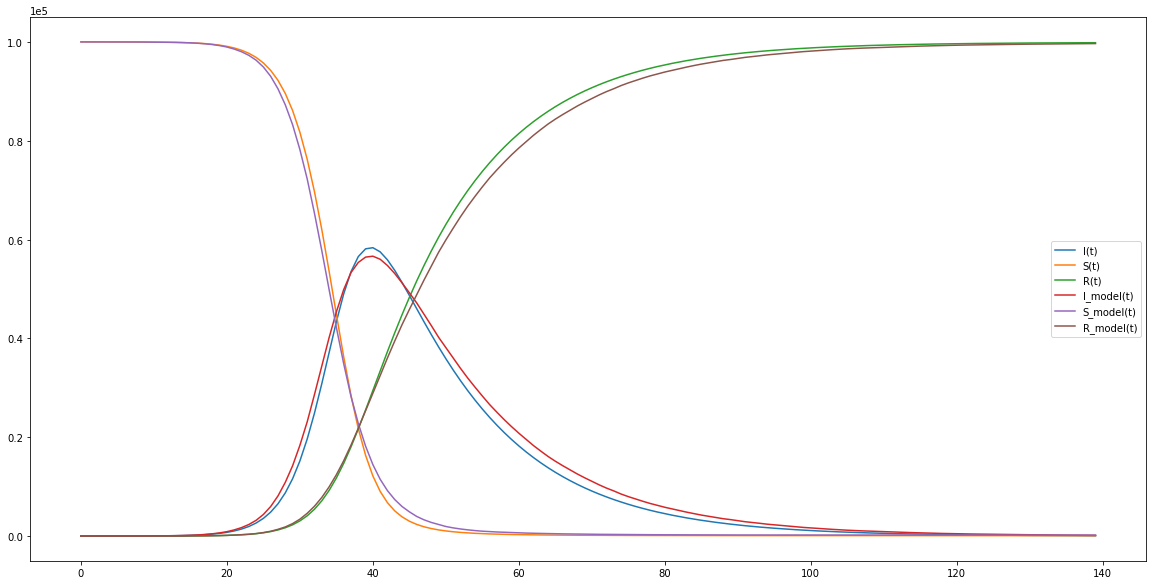

In [82]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.44
gamma = 0.068
iterations = 140

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())